# 数据收集与处理

## ESG数据

In [12]:
import pandas as pd
path='datasets/华证2009-2023年（含细分项+季度)）/华证esg评级2009-2023（细分项）/华证esg评级含细分项（年度）2009-2023.xlsx'
ESG_df = pd.read_excel(path, dtype={'股票代码':str})
ESG_df['股票代码'] = ESG_df['股票代码'].str.zfill(6)
ESG_df.head(1)

,股票代码,年份,综合评级,综合得分,E评级,E得分,S评级,S得分,G评级,G得分,...,重污染分组2,重污染分组3,所属省份代码,所属省份,所属城市代码,所属城市,是否属于西部,是否属于东部,是否属于中部,产权性质
0,000001,2009,BBB,82.38,CCC,69.87,BB,77.46,AA,91.77,...,0.0,0.0,440000.0,广东省,440300.0,深圳市,0.0,1.0,0.0,0.0


<Axes: >

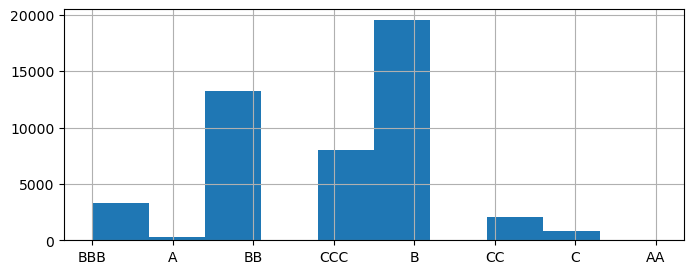

In [13]:
ESG_df['综合评级'].hist(figsize=(8,3))

<Axes: >

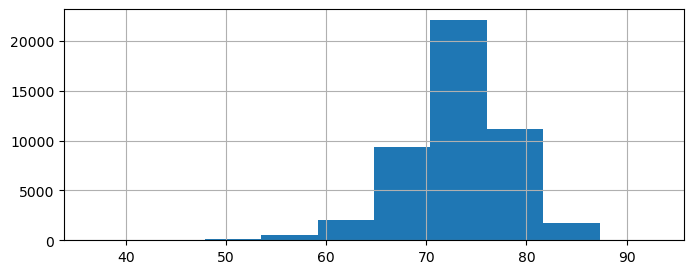

In [14]:
ESG_df['综合得分'].hist(figsize=(8,3))

## 股票价格数据

获取各个ESG评级的股票数据，通常包括收盘价、成交量等每日数据。

In [15]:
close_df = pd.read_feather('datasets/stock_price/Close.feather')
close_df.index = close_df['time']
close_df = close_df.iloc[:, 1:]
close_df.head(1)

code,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688787,688788,688789,688793,688798,688799,688800,688819,688981,689009
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,926.73,1091.9,NaN,61.24,158.64,55.68,NaN,47.34,39.24,35.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
close_df = close_df.ffill()
# 控制缺失值的数量
close_df = close_df.loc[:, (close_df.isnull().sum()>500) == False].dropna()
close_df.shape

(3007, 2323)

合并ESG和价格两个表的股票代码

In [18]:
import numpy as np
code_list = np.intersect1d(ESG_df['股票代码'].values, close_df.columns.values)

In [25]:
code_list

array(['000001', '000002', '000004', ..., '601996', '601998', '601999'],
      dtype=object)

## 保存数据

In [29]:
close_df = pd.read_feather('datasets/stock_price/Close.feather')
close_df.index = close_df['time']
close_df = close_df.iloc[:, 1:].loc[:,code_list]

open_df = pd.read_feather('datasets/stock_price/Open.feather')
open_df.index = open_df['time']
open_df = open_df.iloc[:, 1:].loc[:,code_list]

high_df = pd.read_feather('datasets/stock_price/High.feather')
high_df.index = high_df['time']
high_df = high_df.iloc[:, 1:].loc[:,code_list]

low_df = pd.read_feather('datasets/stock_price/Low.feather')
low_df.index = low_df['time']
low_df = low_df.iloc[:, 1:].loc[:,code_list]

In [31]:
close_df.to_csv('datasets/processed_data/close.csv')
open_df.to_csv('datasets/processed_data/open.csv')
high_df.to_csv('datasets/processed_data/high.csv')
low_df.to_csv('datasets/processed_data/low.csv')